In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the data
df = pd.read_csv('./dataset_2/Hindi_English_Truncated_Corpus.csv') 
# 1. Basic Overview of Data
print("Basic Information about the dataset:")
print(df.info())  # Overview of columns, data types, and non-null counts
print("\nSample Data:\n", df.head())  # Display first few rows
print("\nChecking for missing values:\n", df.isnull().sum())  # Missing values


/home/money_heist_435601/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127607 entries, 0 to 127606
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source            127607 non-null  object
 1   english_sentence  127605 non-null  object
 2   hindi_sentence    127607 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB
None

Sample Data:
       source                                   english_sentence  \
0        ted  politicians do not have permission to do what ...   
1        ted         I'd like to tell you about one such child,   
2  indic2012  This percentage is even greater than the perce...   
3        ted  what we really mean is that they're bad at not...   
4  indic2012  .The ending portion of these Vedas is called U...   

                                      hindi_sentence  
0  राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...  
1  मई आपको ऐसे ही एक बच्चे के बारे में बताना 

In [2]:

# 2. Text Length Analysis
# Add new columns for sentence lengths (number of words)
df['Hindi_Length'] = df['hindi_sentence'].apply(lambda x: len(str(x).split()))
df['English_Length'] = df['english_sentence'].apply(lambda x: len(str(x).split()))

In [3]:
df['Hindi_Length']

0         14
1         11
2          9
3         11
4          8
          ..
127602    15
127603     7
127604    34
127605    10
127606    14
Name: Hindi_Length, Length: 127607, dtype: int64

In [4]:
df['English_Length']

0         12
1          9
2         10
3         12
4          9
          ..
127602    15
127603     6
127604    36
127605    11
127606    12
Name: English_Length, Length: 127607, dtype: int64

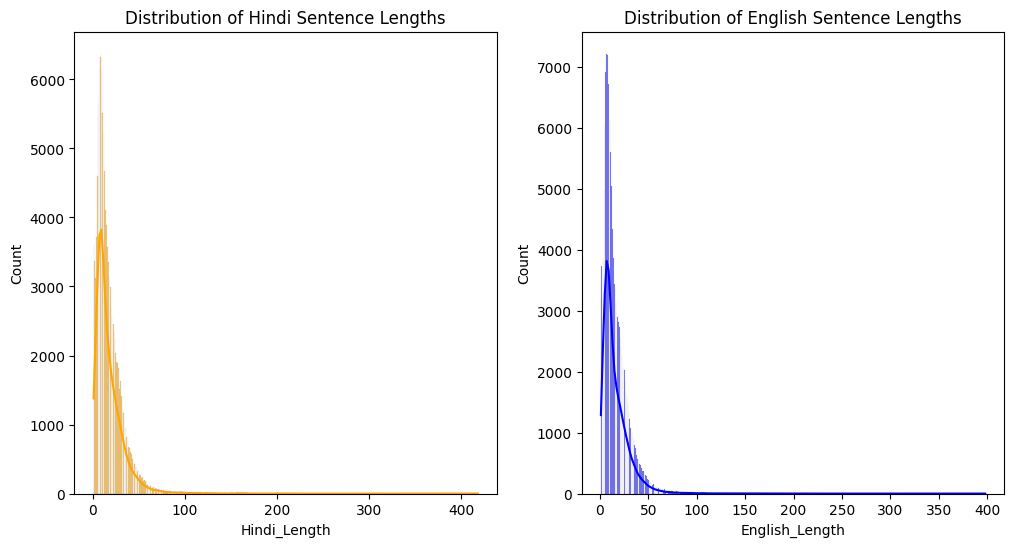

In [5]:
# Plotting the distributions of sentence lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Hindi_Length'], kde=True, color='orange')
plt.title('Distribution of Hindi Sentence Lengths')

plt.subplot(1, 2, 2)
sns.histplot(df['English_Length'], kde=True, color='blue')
plt.title('Distribution of English Sentence Lengths')
plt.show()

In [6]:
# 3. Word Frequency Analysis
# Combine all sentences into one string for Hindi and English
hindi_text = ' '.join(df['hindi_sentence'].dropna().tolist())
english_text = ' '.join(df['english_sentence'].dropna().tolist())

In [7]:
# 4. Translation Quality Checks
# Check for large differences in sentence lengths between Hindi and English
df['Length_Diff'] = abs(df['Hindi_Length'] - df['English_Length'])
outliers = df[df['Length_Diff'] > df['Length_Diff'].quantile(0.95)]  # Sentences in the 95th percentile of length difference
print("\nOutliers with large differences in sentence lengths:\n", outliers[['hindi_sentence', 'english_sentence', 'Length_Diff']])

# 5. Duplicate Entries
duplicates = df[df.duplicated(subset=['hindi_sentence', 'english_sentence'], keep=False)]
print("\nDuplicate Hindi-English pairs:\n", duplicates)


Outliers with large differences in sentence lengths:
                                            hindi_sentence  \
19      बढ़ती हुई मौतों displacements और आर्थिक नुकसान...   
22      इस्लाम धर्म (الإسلام) ईसाई धर्म के बाद अनुयाइ...   
38      इसमें कानूनी रोक ( इंजक्शन ) शामिल है जो बहुत ...   
48      -झूला यह हत्थाकुर्सी से मिलती जुलती पोजीशन है ...   
54      जिसे हम प्रवृत्ति कहते हैं और जिसे हम अपने दैन...   
...                                                   ...   
127490  पाकिस्तान की सत्ता की राजनीति में परंपरा रही ह...   
127536  कैनबिस और एल एस डी जैसी ड्रग्स का आरंभिक प्रयो...   
127563  इसे वे एक कपड़े में रखकर गले में बांध सकते हैं...   
127568  परंतु इस उपबंध में संसद के लिए ऐसी कोई रोक नही...   
127601  अब यह अपनी सीमाओं को फैला रहा है और हो सकता है...   

                                         english_sentence  Length_Diff  
19      Extreme weather due to increased mortality; di...           17  
22      Islam is the world's second-largest religion, ...         